In [66]:
import pandas as pd
import numpy as np
from os import walk, makedirs
import matplotlib.pyplot as plt
from copy import deepcopy
from statistics import mean, stdev

In [67]:
csvout_dir = "csvout/problem2/"
x_runs_dirs = next(walk(csvout_dir))[1]

In [68]:
outputs = {}
for dir in x_runs_dirs:
  files = next(walk(csvout_dir+dir))[2]
  curr_run = list()
  colnames = ['thread']
  for i in range(1,13):
    colnames.append("pass_"+str(i))
  colnames.append("total_time")

  for file in files:
    col = pd.read_csv(f"{csvout_dir}{dir}/{file}").iloc[:, 1]
    times = col.values.tolist()
    append_list = [file]
    append_list.extend(times)
    curr_run.append(append_list)

  df = pd.DataFrame(np.row_stack(curr_run), columns=colnames)
  ## add to the list ##
  outputs.update({dir : df})

In [69]:
keys = list(outputs.keys())
keys.sort()
output_dict = {}
# plt.figure(figsize=(15, 5))
# plt.xlabel("average time taken")
# plt.xticks(rotation=90)
# plt.ylabel("time taken in ms")
# plt.title("times and shit")

colorlist = ['purple','orange','blue','red','green']
colorindex = 0
for key in keys:
  df = outputs.get(key)
  b_output = df.loc[(df["thread"]=='b_output.csv')]
  df = df.drop(b_output.index)
  #store in dick
  b = b_output.to_numpy()[0][1:].astype(float)
  a_mean = list()
  a_std = list()
  pass_stamps = deepcopy(colnames)
  pass_stamps.remove("thread")
  pass_stamps.remove("total_time")
  for col in pass_stamps:
    a_mean.append(mean(np.array(df[col]).astype(float)))
    a_std.append(stdev(np.array(df[col]).astype(float)))

  # plt.bar(pass_stamps,xaxis,color=colorlist[colorindex])
  # plt.errorbar(pass_stamps,xaxis,"o", yerr=ystd)#color=colorlist[colorindex])
  totalmean= mean(np.array(df["total_time"]).astype(float))
  totalstd= stdev(np.array(df["total_time"]).astype(float))
  # plt.plot("total_time",totalmean,"o",color=colorlist[colorindex])#, yerr=totalstd)

  dick = {
    'a_mean' : a_mean,
    'a_std' : a_std,
    'a_total_mean' : totalmean,
    'a_total_std' : totalstd,
    'b_main' : b[:-1],
    'b_total' : b[-1],
    'color' : colorlist[colorindex]
  }
  output_dict.update({key:dick})

  colorindex+=1

# plt.legend(keys)
# plt.figure(figsize=(50, 300))
# plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

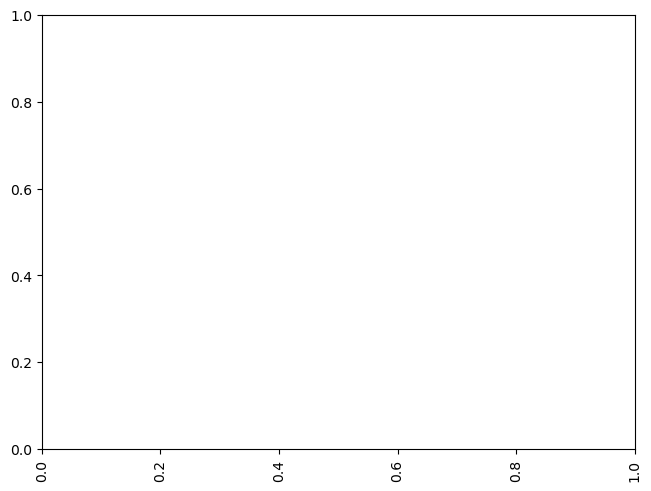

In [71]:
output_dict

x = np.arange(11)  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
plt.xticks(rotation=90)

for key, value in output_dict.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, list(value.get('a_mean')), width, label=key, yerr=list(value.get('a_std')))
  # rects = ax.bar(x + offset, list(value.get('a_mean')), width, label=key)
  # ax.bar_label(rects, padding=3)
  multiplier += 1

ax.set_ylabel('Time in ms')
ax.set_title('Problem2_A_means_with_deviation')
ax.set_xticks(x + width, pass_stamps)
ax.legend(keys)
ax.set_ylim(0, 70000)

plt.show()

In [ ]:
results_mean = {}
i=-1
for col in colnames:
  values = list()
  for key, value in output_dict.items():
    if col=='thread':
      values.append(key)
    elif col=='total_time':
      values.append(value.get('a_total_mean'))
    else:
      values.append(value.get('a_mean')[i])

  i+=1
  results_mean.update({col:values})

In [ ]:
df = pd.DataFrame.from_dict(results_mean)
display(df)

,thread,pass_1,pass_2,pass_3,pass_4,pass_5,pass_6,pass_7,pass_8,pass_9,pass_10,pass_11,pass_12,total_time
0,200runs,675.233579,1170.908721,546.448736,296.456523,503.301897,304.092602,139.253148,59.564465,49.765754,66.864014,35.617495,26.835393,124142.169954
1,300runs,906.279043,1006.003325,337.760018,300.529857,67.585552,31.423070,30.137912,22.290301,18.107603,14.877202,14.696749,14.991437,123420.779613
2,400runs,1276.631718,2888.844703,1614.305931,1637.996035,1962.525907,1316.666893,2039.808588,1649.296855,1643.793668,1773.745654,1633.167654,1052.044982,144180.345715
3,500runs,1115.431427,10156.514984,13350.983339,23296.296155,30069.282813,32572.582989,28795.103976,24994.767484,19730.028371,13301.072252,7265.394294,4198.987354,332392.645129
4,600runs,1114.883745,63579.384009,52765.108788,57592.584869,58319.630145,51137.543406,47062.469372,37539.659063,30671.473784,21000.016706,15514.785756,9324.132202,570642.207563


In [ ]:
results_std = {}
i=-1
for col in colnames:
  values = list()
  for key, value in output_dict.items():
    if col=='thread':
      values.append(key)
    elif col=='total_time':
      values.append(value.get('a_total_std'))
    else:
      values.append(value.get('a_std')[i])

  i+=1
  results_std.update({col:values})

In [ ]:
df = pd.DataFrame.from_dict(results_std)
display(df)

,thread,pass_1,pass_2,pass_3,pass_4,pass_5,pass_6,pass_7,pass_8,pass_9,pass_10,pass_11,pass_12,total_time
0,200runs,656.540102,793.730720,469.793216,341.003650,555.149020,324.126893,174.559817,81.587128,78.976166,88.330965,45.477896,32.326086,2904.178640
1,300runs,518.381807,1052.691715,435.751946,476.080444,149.463297,56.597068,47.402107,33.237252,18.887875,12.194155,11.168328,12.693439,1973.094050
2,400runs,655.327598,3773.549740,1750.111462,1970.130009,2339.175747,1279.909642,1849.816885,1199.355119,1161.954297,1401.012919,1413.362387,1285.784366,6788.769453
3,500runs,708.252320,15169.793445,19348.311088,26832.631018,28447.212284,28655.437827,24916.081443,23133.515637,19378.123769,16005.271654,10940.511189,8222.073502,26587.487155
4,600runs,603.216591,88003.801453,81063.108165,72629.331543,74569.119238,67567.070567,61571.294105,51515.677939,42917.571541,36360.301076,30494.872964,20961.070868,64212.219834


### B results

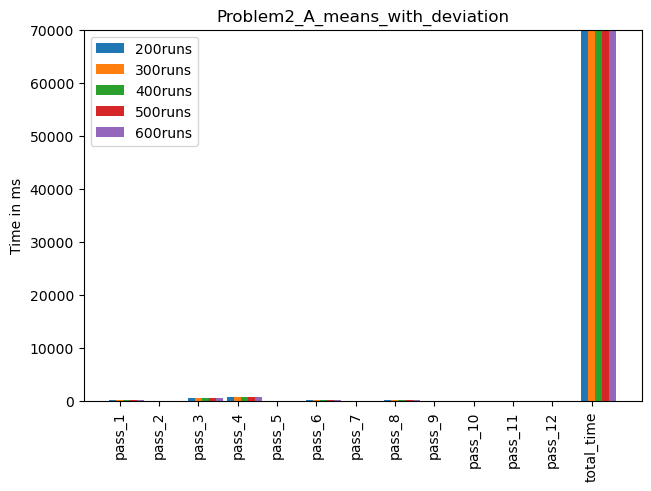

In [ ]:
# dick = {
#     'a_mean' : a_mean,
#     'a_std' : a_std,
#     'a_total_mean' : totalmean,
#     'a_total_std' : totalstd,
#     'b_main' : b[:-1],
#     'b_total' : b[-1],
#     'color' : colorlist[colorindex]
#   }

x = np.arange(13)  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
plt.xticks(rotation=90)

for key, value in output_dict.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, b, width, label=key)
  # rects = ax.bar(x + offset, list(value.get('a_mean')), width, label=key)
  # ax.bar_label(rects, padding=3)
  multiplier += 1

ax.set_ylabel('Time in ms')
ax.set_title('Problem2_B_values')

no_thread = deepcopy(colnames)
no_thread.remove("thread")

ax.set_xticks(x + width, no_thread)
ax.legend(keys)

plt.show()